In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
URLs.PETS

In [5]:
path = untar_data(URLs.PETS)
path.ls()

[PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/crappy'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/annotations')]

In [14]:
path_annotations = path/'annotations'
path_images = path/'images'

In [15]:
filenames = get_image_files(path_images)
filenames[:5]

[PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/Maine_Coon_100.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/Bengal_82.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_180.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/german_shorthaired_7.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/english_setter_110.jpg')]

regex ให้ดูจากท้ายสุด .jpg, ตัวเลข เล้วเอาตัวอักษรทั้งหมด ก่อนถึง / มาเป็น label

In [16]:
batchsize = 64
np.random.seed(42)
regex_pattern = r'/([^/]+)_\d+.jpg$'


default valid percent = 20

from_name_re(path:PathOrStr, fnames:FilePathList, pat:str, valid_pct:float=0.2, **kwargs)

In [17]:
data = ImageDataBunch.from_name_re(path_images, filenames, 
                                   regex_pattern, ds_tfms=get_transforms(), 
                                   size=224, bs=batchsize).normalize()

In [ ]:
len(data.train_ds), len(data.valid_ds)

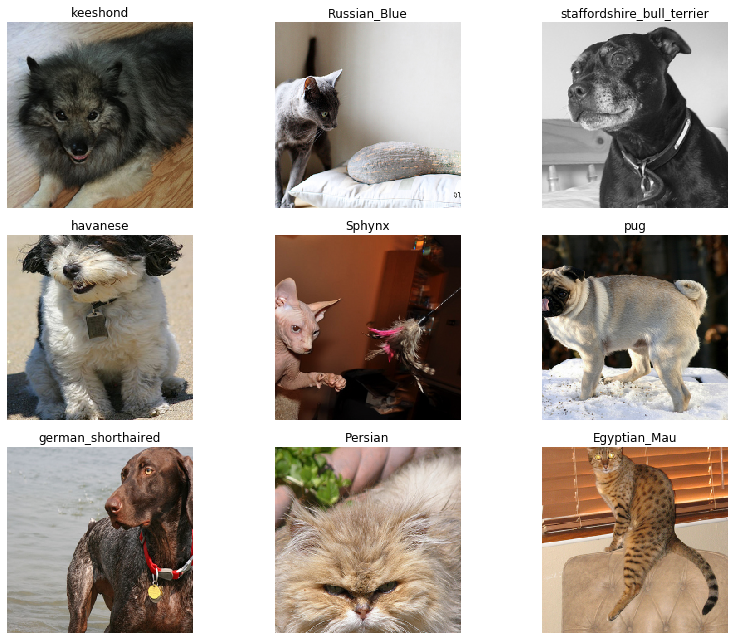

In [19]:
data.show_batch(rows=3, figsize=(12, 9))

In [20]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [21]:
print(data.c)

37


In [22]:
len(data.classes)

37

In [24]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

ลอง fit ด้วย ค่า default

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.434982,0.357949,0.112314,11:01
1,0.556959,0.273469,0.091340,11:09
2,0.347423,0.233556,0.080514,11:14


In [ ]:
learn.save('stage-1')

ดูผลลัพธ์

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

ดูสถิติของโมเดล

In [ ]:
learner.recorder.plot_losses()

In [ ]:
learner.recorder.plot_lr()

In [ ]:
learner.recorder.plot_metrics()

In [ ]:
# learn.load('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(3, max_lr=slice(1e-6, 1e-4))

In [ ]:
learn.save('stage-2')

ดูผลลัพธ์

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

ดูสถิติของโมเดล

In [ ]:
learner.recorder.plot_losses()

กก

In [ ]:
learner.recorder.plot_lr()

In [ ]:
learner.recorder.plot_metrics()